<a href="https://colab.research.google.com/github/jesolisp/NOTAS/blob/main/JESP_respuesta_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradiente descendente

## Propósito
The purpose of the following notebook is to answer some of the questions posed by the review committee towards the doctoral student Edumis Viera whose thesis bears the name of ""

## Metodología
Quickly describe assumptions and processing steps.

## Resultados
Generalization of gradient descent using conformable operators.


## Suggested next steps
To study the efficiency of the optimization method, robustness and accuracy.

# Setup

## Library import
We import all the required Python libraries

In [ ]:
# Data manipulation
import numpy as np

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

# Preliminaries

**Definition 1.** *Let $f:(0,\infty) \rightarrow \mathbb{R}$, then the conformable derivative [1] of $f(x)$ of order $(\gamma > 0)$ is given by*

\begin{equation}
 {}_{}^{K}\mathscr{D}_{x}^{\gamma} f(x) = \lim \limits_{\varepsilon \rightarrow 0} \frac{f(x+\varepsilon x^{1-\gamma}) - f(x)}{\varepsilon},
\end{equation}
*for $\gamma \in (0,1)$.*

**Definition 2.** *Let $f$ a function with $m$ variables $x_{1},\dots,x_{m}$ and the conformable partial derivative of $f$ of order $0<\gamma\leq 1$ in $x_{i}$ is given as follows [2]*

 \begin{equation}
  \frac{\partial^{\alpha}}{\partial x_{i}^{\alpha}} f(x_{1},\dots,x_{m}) = \lim \limits_{\varepsilon \rightarrow 0} \frac{f\left( x_{1},\dots,x_{i-1},x_{i} + \varepsilon x_{i}^{1-\alpha},\dots,x_{m} \right) - f\left( x_{1},\dots,x_{m} \right)}{\varepsilon}.
 \end{equation}
 
 **Definition 3.** *A point $x^{\star}$ is a global minimizer if $f(x^{\star}) \leq f(x)$ for all $x$.*
 
 **Definition 4.** *A point $x^{\star}$ is a local minimizer if there is a neighborhood $\mathscr{N}$ of $x^{\star}$  such that $f (x^{\star}) \leq f(x$) for all $x \in \mathscr{N}$ .*
 
**Definition 5.** *A point $x^{\star}$ is a strict local minimizer (also called a strong local minimizer) if there is a neighborhood $\mathscr{N}$ of  $x^{\star}$ such that $f(x^{\star}) < f(x)$ for all $x \in \mathscr{N}$ with $x\neq x^{\star}$*.

**Definition 6.** *A point $x^{\star}$ is an isolated local minimizer if there is a neighborhood $\mathscr{N}$ of  $x^{\star}$ such that $x^{\star}$ is the only local minimizer in $\mathscr{N}$*.

**Definition 7.** *A function $f$ is called increasing on an interval $I$ if*

\begin{equation}
 f(x_{1}) < f(x_{2}), \quad \text{as long as} \quad x_{1} < x_{2} \text{ at } I.
\end{equation}

*It is called decreasing on $I$ if*

\begin{equation}
 f(x_{1}) > f(x_{2}), \quad \text{as long as} \quad x_{1} < x_{2} \text{ at } I.
\end{equation}

**Theorem 1 (Fermat's theorem).** *If $f$ has a local minimizer or local maximizer at $x^{\star} = c$, and if $\dot{f}(c)$ exists, then $\dot{f}(c) = 0$.*

***Proof***. Suppose $f$ has a local maximum at $x^{\star}=c$. So by definition 3, $f(c) \geq f(x)$ if $x^{\star}$ is close enough to $c$. This implies that if $h$ is close enough to 0 and is positive or negative, then

\begin{equation}
 f(c) \geq f(c+h),
\end{equation}

consequently

\begin{equation}
 \label{ineq1}
 f(c+h)-f(c) \leq 0.
\end{equation}

We can divide both sides of the inequality by a positive number. Thus, if $h>0$ and $h$ is small enough, we have

\begin{equation}
 \frac{f(c+h) - f(c)}{h} \leq 0.
\end{equation}

Taking the limit from the right of both sides of the inequality, we get

\begin{equation}
 \lim \limits_{h\rightarrow 0^{+}} \frac{f(c+h) - f(c)}{h} \leq \lim \limits_{h\rightarrow 0^{+}} 0 = 0.
\end{equation}

But, since $\dot{f}(c)$ exists, we have

\begin{equation}
 \dot{f}(c)  = \lim \limits_{h\rightarrow 0} \frac{f(c+h) - f(c)}{h} = \lim \limits_{h\rightarrow 0^{+}} \frac{f(c+h) - f(c)}{h},
\end{equation}

and this shows that $\dot{f}(c) \leq 0$. 

If $h<0$, then the direction of inequality \eqref{ineq1} is reversed when we divide by $h$

\begin{equation}
 \frac{f(c+h)-f(c)}{h} \geq 0,\quad h<0.
\end{equation}

So taking the limit from the left, we have

\begin{equation}
 \dot{f}(c) = \lim \limits_{h\rightarrow 0^{-}} \frac{f(c+h) - f(c)}{h}  \geq 0  \quad \Box.
\end{equation}


# Data processing
The Gradient Descendent (GD) is a first order derivative optimization algorithm for finding the extreme value of a given function. This algorithm takes steps proportional to the negative of the gradient (or approximate gradient) of the function $f$ at the current point. For example, $x_{k}$ is updated by the following law

\begin{equation}
 \label{GDeq}
 x_{k+1} = x_{k} - \eta \cdot \nabla f(x_{k}),
\end{equation}

where $x_{k}$ is the current position, $x_{k+1}$ is the next position, $\eta$ is the learning rate and $\nabla f(x_{k})$ is the first order gradient at $x = x_{k}$, i.e. $\frac{\mathrm{d}}{\mathrm{d}x} \left. f(x) = \right|_{x=x_{k}} $.

Assuming that $f(x)$ is differentiable, then

\begin{equation}
 \nabla^{\gamma} f(x_{k}) := x^{1-\gamma}\frac{\mathrm{d}}{\mathrm{d}x}f(x).
\end{equation}

Consequently, we have the Conformable GD (CGD)

\begin{equation}
 \label{CGDeq}
 x_{k+1} = x_{k} - \eta \cdot \nabla^{\alpha} f(x_{k}).
\end{equation}

**Remarks.** Eq. \eqref{GDeq} degenerates into Eq. \eqref{CGDeq} exactly when $\gamma=1$.

## Example 1

If $f(x) = (x-5)^{2}$, then its global minimizer is $x^{\star} = 5$. Because its first order derivative is $\dot{f}(x) = 2x-10$ and  $\dot{f}(5) = 0$. Whereas for $\gamma \in (0,1)$, ist conformable order derivative satisfies

\begin{equation}
 {}_{}^{K}\mathscr{D}_{x}^{\gamma} f(x)  = x^{1-\gamma} \cdot \left( 2x - 10 \right).
\end{equation}

We set $\eta = 0.1$, $x_{0} = 1$ and $\gamma = 0.7$ to get the following simulations results

In [ ]:
def gradient_descendent(Df, x0, n, epochs, alpha):
    x = np.zeros(epochs)
    GD = np.zeros(epochs)

    x[0] = x0

    k = 0

    while k < epochs-1:
        x[k+1] = x[k] - n*(x[k]**(1-alpha))*(Df(x[k]))
    
        GD[k] = (x[k]**(1-alpha))*Df(x[k])
        
        k = k + 1
        
    return GD, x

v.c. classical: 4.993810299803573
v.c. conformable: 4.999918892303116


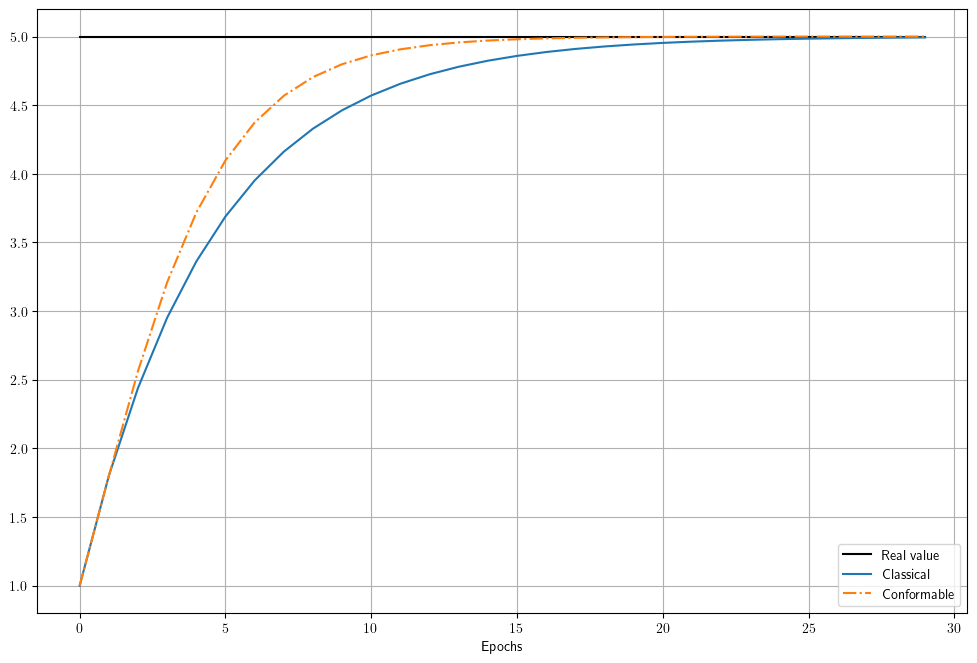

In [ ]:
n = 0.1
x0 = 1
epochs = 30
Dfx = lambda x: 2*x - 10

GD, x = gradient_descendent(Dfx, x0, n, epochs, 1)
CGD, xc = gradient_descendent(Dfx, x0, n, epochs, 0.7)

print('v.c. classical: {}'.format(x[-1]))
print('v.c. conformable: {}'.format(xc[-1]))

plt.figure()
plt.plot(5*np.ones(len(x)), 'k', label = 'Real value', linewidth = 1.5)
plt.plot(x, label = 'Classical', linewidth = 1.5)
plt.plot(xc, '-.',label = 'Conformable', linewidth = 1.5)
plt.xlabel('Epochs')
plt.axis('tight')
plt.legend()
plt.grid('on')
plt.show()

It is clearly observed that the conformable operator can realize the convergence within 20 steps while only the classical operator is able to converge to the exact global minimizer.

In [ ]:
CGD_09, xc = gradient_descendent(Dfx, x0, n, epochs, 0.9)
CGD_05, xc = gradient_descendent(Dfx, x0, n, epochs, 0.5)
CGD_03, xc = gradient_descendent(Dfx, x0, n, epochs, 0.3)

The following Figure shows the effect of the conformable operator on the function's gradient.

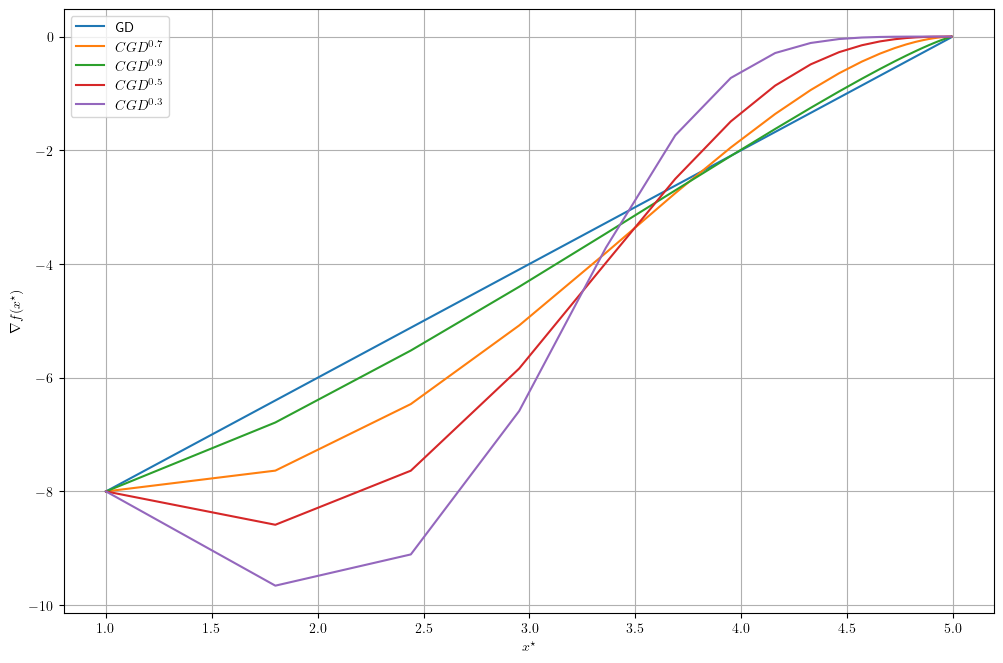

In [ ]:
plt.figure()
plt.plot(x, GD, label = 'GD')
plt.plot(x, CGD, label = '$CGD^{0.7}$')
plt.plot(x, CGD_09, label = '$CGD^{0.9}$')
plt.plot(x, CGD_05, label = '$CGD^{0.5}$')
plt.plot(x, CGD_03, label = '$CGD^{0.3}$')
plt.xlabel('$x^{\star}$')
plt.ylabel('$\\nabla f(x^{\star})$')
plt.legend()
plt.grid('on')
plt.show()
    

**Theorem 2 (Rolle's theorem).**
*If $f$ is a function that satisfies the following three hypotheses:*
1. *$f$ is continuous on the closed interval $[a, b]$*
2. *$f$ is differentiable over the open interval $(a, b)$*
3. *$f(a)=f(b)$*
*then there is a number $c$ in $(a, b)$ such that $\dot{f}(c)= 0$.*

***Proof***. 

**CASE I. $\bf f (x) = k$, a constant**

Then $\dot{f}(x) = 0$, so the number $\bf c$ can take any number in $\bf(a, b)$.

**CASE II. $\bf f (x)> f (a)$, for some $\bf x \in (a, b)$.**

By the extreme value theorem (which we can apply by hypothesis 1), $f$ has a value maximum somewhere in $[a, b]$. Since $f (a) = f (b)$, it must reach this maximum value at a number $c$ in the open interval $(a, b)$, then $f$ has a local maximum at $c$ and, by hypothesis 2, $f$ is differentiable at $c$. Therefore, $\dot{f} (c) = 0$ by Fermat's theorem.

**CASE III. $\bf f(x) <f (a)$ for some $\bf x \in(a, b)$.**

By the extreme value theorem, $f$ has a minimum value at $[a, b]$ and, since $f (a) = f (b)$, reaches this minimum value at a number $x = c \in (a, b)$. Again, $\dot{f} (c) = 0$ by the Fermat's theorem.

**Theorem 3 (Mean Value Theorem).**
*If $f$ is a function that satisfies the following hypotheses*
*1. $f$ is continuous on the closed interval $[a,b]$.*
*2. $f$ is differentiable over the open interval $(a, b)$.*

*then there exists a number $x = c$ in $(a, b)$ such that*

\begin{equation}
 \dot{f}(c) = \frac{f(b)-f(a)}{b-a},
\end{equation}

*or, equivalently*

\begin{equation}
 f(b) - f(a) = \dot{f}(c)(b-a).
\end{equation}

***Proof***. We apply Theorem 2 to a new function $h$ defined as the difference between $f$ and the function whose graph is the secant line $AB$. Using 

\begin{equation}
 m_{AB} = \frac{f(b)-f(a)}{b-a},
\end{equation}

we see that the equation of the line $AB$ can be written as

\begin{equation}
 y - f(a) = \frac{f(b)-f(a)}{b-a}(x-a),
\end{equation}

or as

\begin{equation}
 y = f(a)  + \frac{f(b)-f(a)}{b-a}(x-a).
\end{equation}

So

\begin{equation}
 \label{eqn4}
 h(x) = f(x) - f(a)  - \frac{f(b)-f(a)}{b-a}(x-a).
\end{equation}

First, we must verify that $h$ satisfies the three hypotheses of **Theorem 2**.
1. The function $h$ is continuous on $[a, b]$ because it is the sum of $f$ and a first degree polynomial function, both continuous.
2. The function $h$ is differentiable over $(a, b)$ because $f$ and the first degree polynomial function are differentiable. In fact, we can calculate $\dot{h}$ directly from Eq. \eqref{eqn4}:


**Remarks.** Note that $f(a)$ and $[f(b)- f(a)]/(b-a)$ are constants.

Therefore, $h(a) = h(b)$.

Since $h$ satisfies the assumptions of **Theorem 2**, which states that there exists a number $x = c$ in $(a, b)$ such that $\dot{h}(c)=0$, then we have

\begin{equation}
 0 = \dot{h}(c) = \dot{f}(c) - \frac{f(b)-f(a)}{b-a},
\end{equation}

so

\begin{equation}
 \dot{f}(c) = \frac{f(b) - f(a)}{b-a} \quad \Box
\end{equation}

**Theorem  4.**

1. *If $\dot{f}(x)>0$ on an interval, then $f$ is increasing on that interval.*
2. *If $\dot{f}(x)<0$ on an interval, then $f$ is decreasing on that interval.*

***Proof***. Let $x_{1}$ and $x_{2}$ be any two numbers in the interval with $x_{1}< x_{2}$. According to the definition of an increasing function (**Definition 7**), we need to show that $f(x_{1})<f(x_{2})$.

We know that $\dot{f}(x)>0$ and that $f$ is differentiable over ($x_{1},x_{2}$), so by the Theorem 3, there is a number $c$ between $x_{1}$ and $x_{2}$ such that

\begin{equation}
 \label{eqn1}
 f(x_{2}) - f(x_{1}) = \dot{f}(c)(x_{2}-x_{1}).
\end{equation}

Now $\dot{f}(c)>0$ on the assumption that $x_{2}- x_{1}> 0$ since $x_{1} < x_{2}$. Thus, the right hand side of Eq. \eqref{eqn1} is 

\begin{equation}
 f(x_{2}) - f(x_{1}) > 0, \quad \text{o} \quad f(x_{1}) < f(x_{2})
\end{equation}

which shows that $f$ is increasing.

Part 2 is proved in a similar way

\begin{equation}
    x_{1} < x_{2}, \quad \text{then} \quad f(x_{1}) > f(x_{2}).
\end{equation}

# Conformable approach

**Theorem  5 (Rolle’s Theorem for conformable differentiable functions).**

*Let $a > 0$ and $f : [a, b] \rightarrow \mathbb{R}$ be a given function that satisfies*
1. *$f$ is continuous on $[a, b]$.*
2. *$f$ is $\gamma$-differentiable for some $\gamma \in (0, 1)$.*
3. *$f (a) = f (b)$.*

*Then, there exists $c \in (a, b)$, such that $f^{\gamma}(c) = 0$.*

**Proof.** *Since $f$ is continuous on $[a, b]$, and $f (a) = f (b)$, there is $c \in (a, b)$, which is a point of local extrema. With no loss of generality, assume $c$ is a point of local minimum. So*

\begin{equation}
 f^{\gamma} (c) = \lim \limits_{\varepsilon \rightarrow 0^{+}} \frac{f\left(c + \varepsilon c^{1-\alpha}\right) - f(c)}{\varepsilon} = \lim \limits_{\varepsilon \rightarrow 0^{-}} \frac{f\left(c + \varepsilon c^{1-\alpha}\right) - f(c)}{\varepsilon}
\end{equation}

*But, the first limit is non-negative, and the second limit is non-positive. Hence $f^{\gamma}(c) = 0. \quad \Box $*

**Theorem 6 (Mean Value Theorem for conformable differentiable functions)**

*Let $a > 0$ and $f : [a, b] \rightarrow \mathbb{R}$ be a given function that satisfies*
1. $f$ is continuous on $[a, b]$.
2. $f$ is $\gamma$-differentiable for some $\gamma \in (0, 1)$.

*Then, there exists $c \in (a, b)$, such that $f^{\gamma} (c) = \frac{f(b)-f(a)}{\frac{1}{\gamma}b^{\gamma}- \frac{1}{\gamma}a^{\gamma}}.$*

**Proof.** *Consider the function*

\begin{equation}
 g(x) = f(x) - f(a) - \frac{f(b)-f(a)}{\frac{1}{\gamma}b^{\gamma}- \frac{1}{\gamma}a^{\gamma}} \left( \frac{1}{\gamma}x^{\gamma} - \frac{1}{\gamma} a^{\gamma} \right)
\end{equation}

*Then the function $g$ satisfies the conditions of Rolle’s theorem. Hence there exists $c \in (a, b)$, such that $g^{\gamma}(c) = 0$. Using the fact that  $ {}_{}^{K}\mathscr{D}_{x}^{\gamma}~ \frac{1}{\gamma}t^{\gamma} = 1$, the result follows. $\Box$*

## Example 2

If ${}_{}^{K}\mathscr{D}_{x}^{\gamma} {f}(x)<0$ on an interval, then $f$ is decreasing on that interval. So, we need to show that  $f(x_{1})>f(x_{2})$ using **Theorem 6**.



# References
[1] R. Khalil, M. Al Horani, A. Yousef, and M. Sababheh, “A new definition of fractional derivative,” Journal of computational and applied mathematics, vol. 264, pp. 65–70, 2014.

[2] A. Atangana, D. Baleanu, and A. Alsaedi, “New properties of conformable derivative,” Open Mathematics, vol. 13, no. 1, 2015.